In [1]:
# pip install -U transformers
# pip install sentencepiece
# downloads the model to this path:
# C:\Users\kaveh\.cache\huggingface\hub
from transformers import pipeline
import torch

from pprint import pprint

In [5]:
torch.cuda.is_available()

True

In [6]:
torch.cuda.current_device()

0

In [4]:
classifier = pipeline("sentiment-analysis",device=0)

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [ ]:
pipe = pipeline("sentiment-analysis", model = "./pretrained models")

In [5]:
# This will print the details of the pipeline, including the task it is associated with
print(classifier)

In [6]:
# She's flying high after the successful interview.
# She's a bit down in the dumps because she's got to take her exams again.
# Sounds like you are at the end of your rope.
#  I asked him one simple question and he bit my head off.
# -, +, -, -, - 
results = classifier(["The bride had butterflies in her stomach as she got ready to walk down the aisle.",#=
               "She's flying high after the successful interview.",#+
               "Sounds like you are at the end of your rope.",#-
               "I asked him one simple question and he bit my head off.",# -
               "Sometimes the people who appear to be the most confident are actually afraid of their own shadows."])# -

###  This returns a label (“POSITIVE” or “NEGATIVE”) alongside a score, as follows

In [7]:
results

[{'label': 'POSITIVE', 'score': 0.9875583648681641},
 {'label': 'POSITIVE', 'score': 0.9993983507156372},
 {'label': 'NEGATIVE', 'score': 0.9126458168029785},
 {'label': 'NEGATIVE', 'score': 0.9893919229507446},
 {'label': 'NEGATIVE', 'score': 0.9975023865699768}]

# Extractive Question Answering

* Extractive Question Answering is the task of extracting an answer from a text given a question. An example of a question answering dataset is the SQuAD dataset, which is entirely based on that task. If you would like to fine-tune a model on a SQuAD task, you may leverage the run_qa.py and run_tf_squad.py scripts.

* Here is an example of using pipelines to do question answering: extracting an answer from a text given a question. It leverages a fine-tuned model on SQuAD.

### The Stanford Question Answering Dataset (SQuAD) is a reading comprehension dataset consisting of question-answer pairs derived from Wikipedia articles. <br>
### In SQuAD, the correct answers to questions can be any sequence of tokens in the given text, and the questions and answers are **produced by humans through crowdsourcing**, making it more diverse than some other question-answering datasets. SQuAD 1.1 contains 107,785 question-answer pairs on 536 articles, while SQuAD 2.0 (open-domain SQuAD, SQuAD-Open) combines the 100,000 questions in SQuAD 1.1 with over 50,000 unanswerable questions written by crowdworkers
* The SQuAD dataset is widely used in the NLP community for evaluating the performance of various models, including the Mixtral-8x7B model.

In [8]:
question_answerer = pipeline("question-answering",device=0)

context = r"""

Extractive Question Answering is the task of extracting an answer from a text given a question. An example of a

question answering dataset is the SQuAD dataset, which is entirely based on that task. If you would like to fine-tune

a model on a SQuAD task, you may leverage the examples/pytorch/question-answering/run_squad.py script.

"""

No model was supplied, defaulted to distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


#### This returns an answer extracted from the text, a confidence score, alongside “start” and “end” values, which are the positions of the extracted answer in the text.

In [9]:
result = question_answerer(question="What is extractive question answering?", context=context)

print(f"Answer: '{result['answer']}', score: {round(result['score'], 4)}, start: {result['start']}, end: {result['end']}")
# Answer: 'the task of extracting an answer from a text given a question', score: 0.6177, start: 34, end: 95

Answer: 'the task of extracting an answer from a text given a question', score: 0.6177, start: 35, end: 96


In [10]:
context[35:96]

'the task of extracting an answer from a text given a question'

In [11]:
result = question_answerer(question="What is a good example of a question answering dataset?", context=context)

print(f"Answer: '{result['answer']}', score: {round(result['score'], 4)}, start: {result['start']}, end: {result['end']}")

Answer: 'SQuAD dataset', score: 0.5152, start: 149, end: 162


# Masked Language Modeling

* Masked language modeling is the task of masking tokens in a sequence with a masking token, and prompting the model to fill that mask with an appropriate token. This allows the model to attend to both the right context (tokens on the right of the mask) and the left context (tokens on the left of the mask). Such a training creates a strong basis for downstream tasks requiring bi-directional context, such as SQuAD

In [12]:
# from transformers import pipeline
unmasker = pipeline("fill-mask",device=0)

No model was supplied, defaulted to distilroberta-base and revision ec58a5b (https://huggingface.co/distilroberta-base).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of the model checkpoint at distilroberta-base were not used when initializing RobertaForMaskedLM: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


> This outputs the sequences with the mask filled, the confidence score, and the token id in the tokenizer vocabulary: 

In [13]:
# This outputs the sequences with the mask filled, the confidence score, and the token id in the tokenizer vocabulary:

pprint(unmasker(f"Learning programming language is very {unmasker.tokenizer.mask_token}"))

[{'score': 0.09907665848731995,
  'sequence': 'Learning programming language is very difficult',
  'token': 1202,
  'token_str': ' difficult'},
 {'score': 0.07345674186944962,
  'sequence': 'Learning programming language is very rewarding',
  'token': 16044,
  'token_str': ' rewarding'},
 {'score': 0.06690500676631927,
  'sequence': 'Learning programming language is very easy',
  'token': 1365,
  'token_str': ' easy'},
 {'score': 0.051415737718343735,
  'sequence': 'Learning programming language is very complicated',
  'token': 6336,
  'token_str': ' complicated'},
 {'score': 0.04730522632598877,
  'sequence': 'Learning programming language is very useful',
  'token': 5616,
  'token_str': ' useful'}]


# Causal Language Modeling

> Causal language modeling is the task of predicting the token following a sequence of tokens. In this situation, the model only attends to the left context (tokens on the left of the mask).

## Text Generation

>> * In text generation (a.k.a open-ended text generation) the goal is to create a coherent portion of text that is a continuation from the given context. The following example shows how GPT-2 can be used in pipelines to generate text.<br>
>> * GPT-2 and GPT-3 are both large-scale language models developed by OpenAI. The main difference between the two models is their size and the amount of training data used. GPT-2 has 1.5 billion parameters and was trained on a dataset of 40GB of text data, while GPT-3 has 175 billion parameters and was trained on a dataset of 570GB of text data

In [14]:
text_generator = pipeline("text-generation",device=0)

No model was supplied, defaulted to gpt2 and revision 6c0e608 (https://huggingface.co/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.


## Now test the different prompts

In [20]:
# As far as I am concerned, I will
pprint(text_generator("what are the main causes of climate change?", max_length=100))

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'what are the main causes of climate change? Does it '
                    'impact the rest of us as well? Let us see.\n'
                    '\n'
                    'How much do you pay for air travel in the U.S.?\n'
                    '\n'
                    'From 2000 to 2020, there will likely be an average of 2.5 '
                    'trips per passenger (3.17 million total); in 2050 there '
                    'will be an average of 3.3 trips per passenger (2.4 '
                    'million total); and in 2050 there will be an average of '
                    '2.6 trips'}]


In [21]:
# generate multiple possible continuation
pprint(text_generator("what are the main causes of climate change?",num_return_sequences=2,max_length=100 ))

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'what are the main causes of climate change?\n'
                    '\n'
                    'A: There are various variables, including factors like '
                    'deforestation, human-induced climate change, volcanic '
                    'activity, wind, the ocean and wildfires. Some factors are '
                    'mainly linked to greenhouse gas emissions or human '
                    'activity. But more than one factor may impact one cause '
                    'of climate change that is tied directly to human '
                    'activity. In many cases, this is done through other means '
                    'to increase natural cycles, such as agricultural methods '
                    'and climate change mitigation practices. So it would'},
 {'generated_text': 'what are the main causes of climate change?\n'
                    '\n'
                    "Yes! That's right, climate change is just part of the "
                    'story. Climate ch

# NER in transformers
> 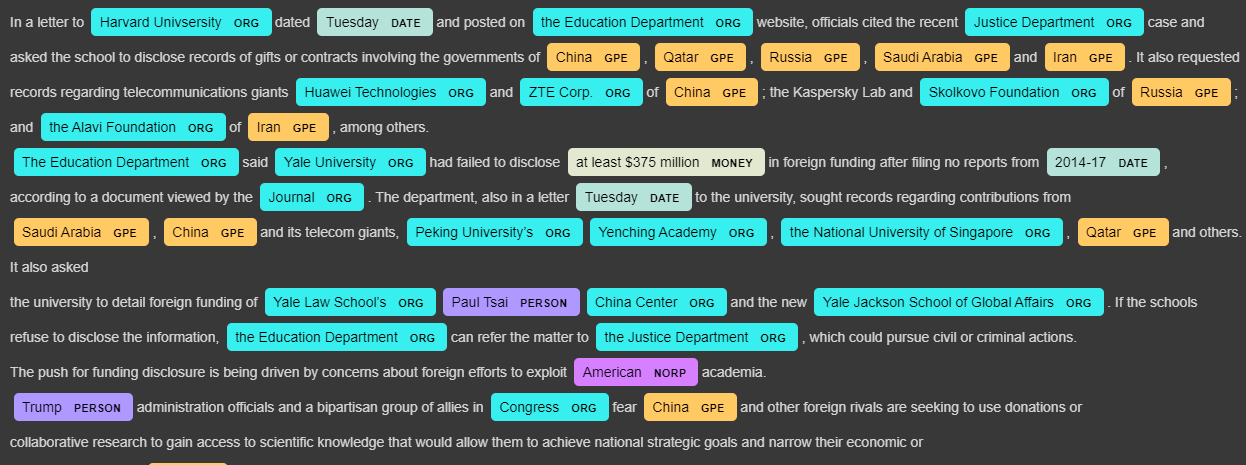

In [22]:
ner = pipeline("ner",aggregation_strategy="simple",device=0)

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision f2482bf (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/998 [00:00<?, ?B/s]

C:\Users\kaveh\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:149: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\kaveh\.cache\huggingface\hub\models--dbmdz--bert-large-cased-finetuned-conll03-english. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.weight', 'bert.pooler.dense.bias']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

In [28]:
pprint(ner("arak is a city in iran, where I Kaveh Karimadini is currently living"))

[{'end': 4,
  'entity_group': 'LOC',
  'score': 0.9730171,
  'start': 0,
  'word': 'arak'},
 {'end': 22,
  'entity_group': 'LOC',
  'score': 0.83285266,
  'start': 18,
  'word': 'iran'},
 {'end': 48,
  'entity_group': 'PER',
  'score': 0.95810544,
  'start': 32,
  'word': 'Kaveh Karimadini'}]


# Text Summarization
> 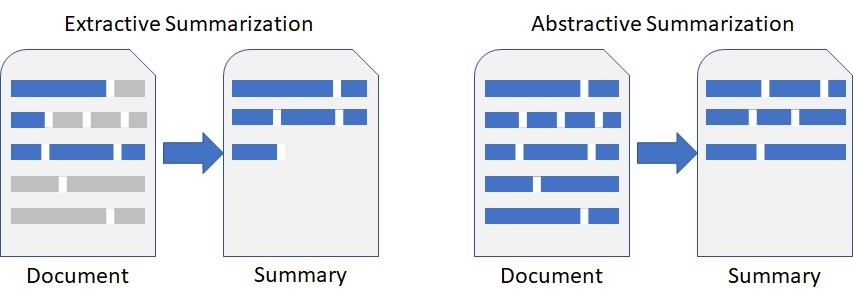

In [32]:
summarizer = pipeline("summarization",device=0)

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [33]:
long_text = r"""

Artificial intelligence (AI), 
in its broadest sense, is intelligence exhibited by machines, 
particularly computer systems, as opposed to the natural intelligence of living beings. 
As a field of research in computer science focusing on the automation of intelligent behavior through machine learning, 
it develops and studies methods and software which enable machines to perceive their environment and take actions that maximize their chances of achieving defined goals, with the aim of performing tasks typically associated with human intelligence. Such machines may be called AIs.
AI technology is widely used throughout industry, government, and science. 
Some high-profile applications include advanced web search engines (e.g., Google Search); 
recommendation systems (used by YouTube, Amazon, and Netflix); interacting via human speech (e.g., Google Assistant, Siri, and Alexa); autonomous vehicles (e.g., Waymo); generative and creative tools (e.g., ChatGPT and AI art); 
and superhuman play and analysis in strategy games (e.g., chess and Go).[1] However, many AI applications are not perceived as AI: "A lot of cutting edge AI has filtered into general applications, often without being called AI because once something becomes useful enough and common enough it's not labeled AI anymore."

"""

In [34]:
pprint(summarizer(long_text))

[{'summary_text': ' Artificial intelligence (AI) is a field of research in '
                  'computer science focusing on the automation of intelligent '
                  'behavior through machine learning . Some high-profile '
                  'applications include advanced web search engines (e.g., '
                  'Google Search) and advanced AI systems . AI technology is '
                  'widely used throughout industry, government, and science . '
                  'However, many AI applications are not perceived as AI .'}]


# Restart Kernel 5G already used!!!!!!

# Machine Translation
> 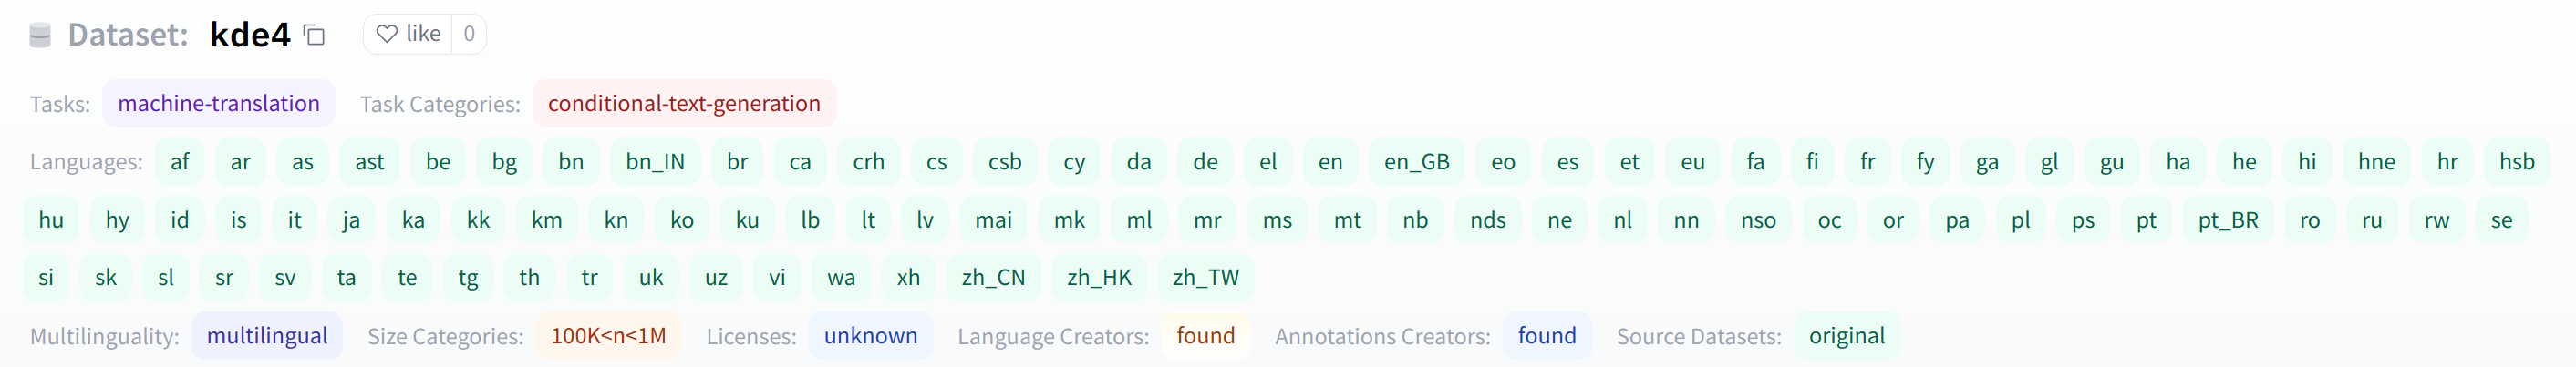

In [7]:
translator = pipeline("translation", model="Helsinki-NLP/opus-mt-en-ar",device=0)

C:\Users\kaveh\AppData\Local\anaconda3\envs\GPU_Kaveh\Lib\site-packages\transformers\models\marian\tokenization_marian.py:197: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


In [8]:
translator("I am Kaveh Karimadini, my age is 24")

[{'translation_text': 'أنا (كافه كريم الديني) عمري 24'}]

# Zero-Shot clasifier
> 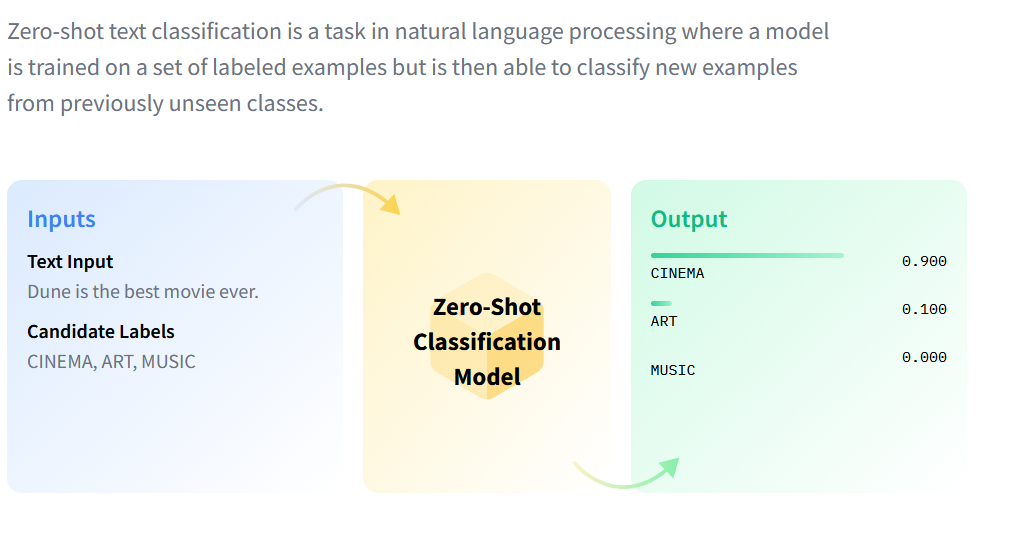

In [9]:
zero_classifier = pipeline("zero-shot-classification",device=0)

No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

C:\Users\kaveh\AppData\Local\anaconda3\envs\GPU_Kaveh\Lib\site-packages\huggingface_hub\file_download.py:149: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\kaveh\.cache\huggingface\hub\models--facebook--bart-large-mnli. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [15]:
zero_classifier("the last air bender was amusing to watch",candidate_labels=["movie","series"])

{'sequence': 'the last air bender was amusing to watch',
 'labels': ['movie', 'series'],
 'scores': [0.7396421432495117, 0.2603577971458435]}

# END OF ARC 101 Class (DO not run bellow part!!!!!!!!!!!)

# Mixtral-8x7B is a high-quality sparse mixture of experts model (SMoE) with open weights, released by Mistral AI under the Apache 2.0 license
* It is the second Large Language Model (LLM) developed by Mistral AI and contains 46.7B parameters
* Mixtral-8x7B outperforms the Llama 2 70B model in most benchmarks while delivering six times faster inference
* The model has 8 sub-networks acting as experts, and at each layer and for each token, only 2 of these sub-networks are activated
* Mixtral-8x7B can efficiently run on consumer hardware, and inference with Mixtral-8x7B is significantly faster than other models of similar size

# you may need to use a quantized version of the model, such as the GGUF (Generalized Growing and Fusion) model, which can be run with fewer GPU resources1
### Here's a summary of the required GPU memory for different precisions:

    Float16 (half-precision): >90 GB
    8-bit: >45 GB
    4-bit: >23 GB

### You can try using the 4-bit quantized model, which requires less memory and might be compatible with your GPU
#### To use the model with 4-bit quantization, you can follow these steps:

    #Install the required libraries:
    bash
    pip install transformers accelerate

### Load the model using the from_pretrained method with the config_map parameter set to "4bit":
    python
    from transformers import AutoModel
    model = AutoModel.from_pretrained("TheBloke/Mixtral-8x7B-Instruct-v0.1-GGUF", cache_dir="path_to_cache_directory", config_map={"use_4bit_int": True})

### Move the model to the GPU if available:

    python
    if torch.cuda.is_available():
        model = model.to_device("cuda")

## The CPU and RAM requirements for running the model:
* depends on the specific use case and the desired performance. The model can be run on a modern multi-core CPU for best performance, with recommendations for an Intel Core i7 from 8th gen onward or an AMD Ryzen 5 from 3rd gen
* The RAM requirements can vary based on the specific model and its quantization. For example, a 4-bit 13 billion parameter Mixtral model takes up around 7.5GB of RAM

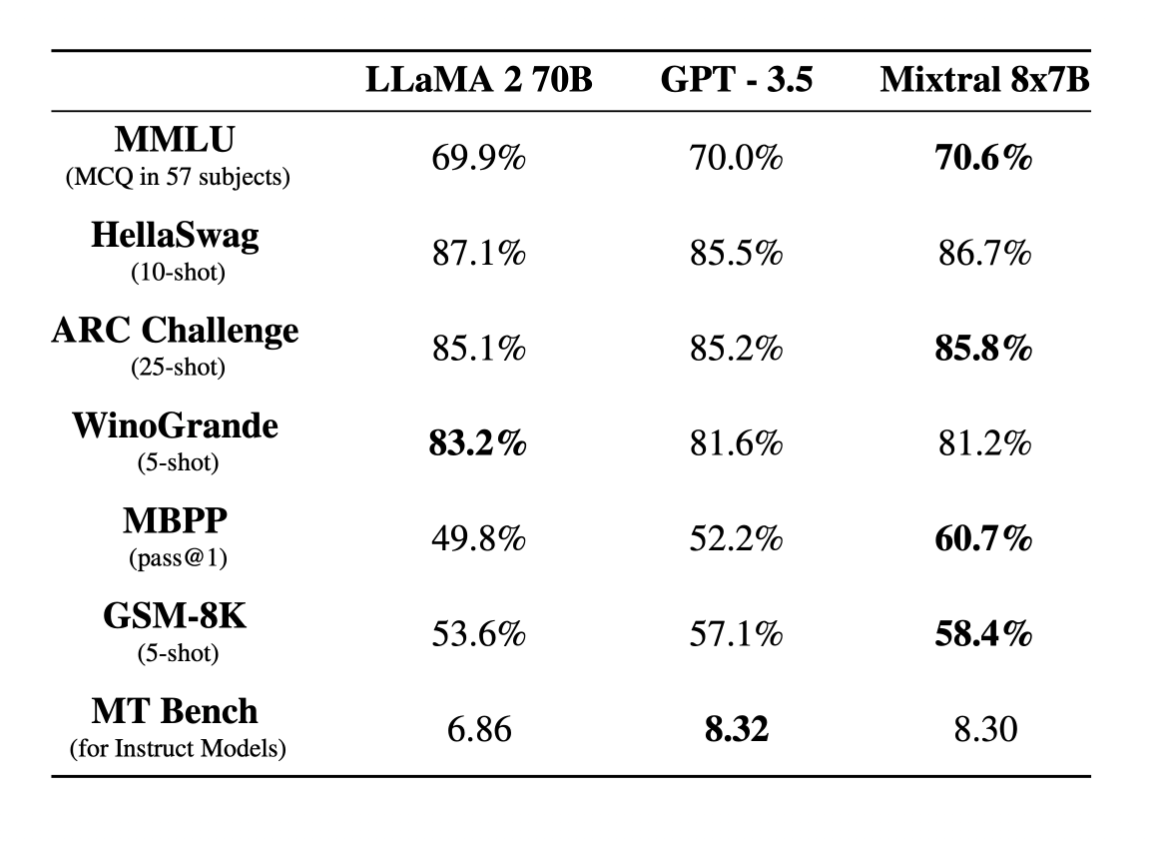

In [ ]:
generator_Mixtral = pipeline("text-generation", model="mistralai/Mixtral-8x7B-v0.1")

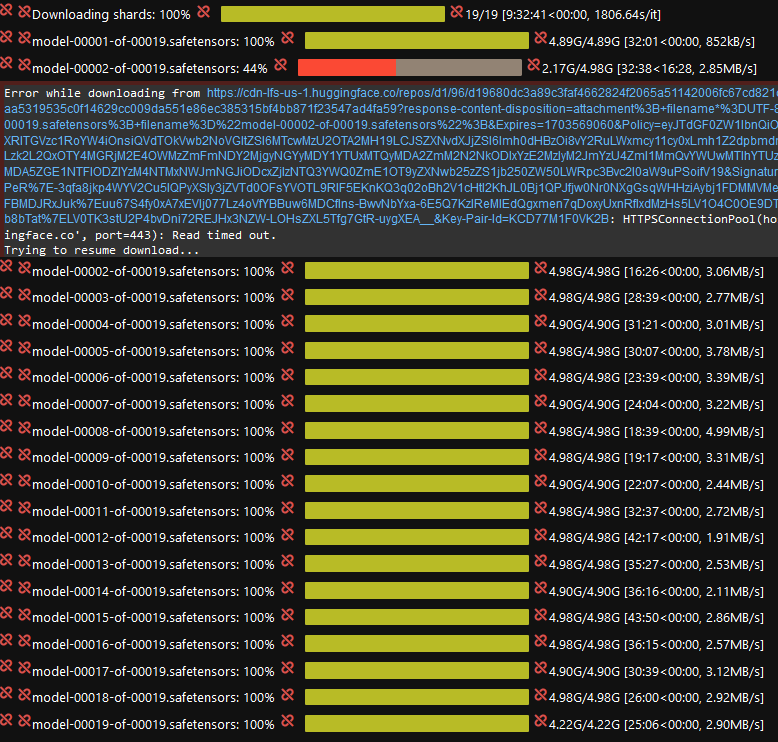

# using the Mixtral-8x7B model:
* Text summarization:
```
from transformers import AutoModelForCausalLM, AutoTokenizer

model_id = "mistralai/Mixtral-8x7B-Instruct-v0.1"
tokenizer = AutoTokenizer.from_pretrained(model_id)
model = AutoModelForCausalLM.from_pretrained(model_id)

text = "Your input text for summarization here"
inputs = tokenizer(text, return_tensors="pt")
summary_ids = model.generate(inputs, max_length=150, min_length=30, num_beams=2)
summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
print(summary)
```

* Text Completion:
```
python
from transformers import AutoModelForCausalLM, AutoTokenizer

model_id = "mistralai/Mixtral-8x7B-Instruct-v0.1"
tokenizer = AutoTokenizer.from_pretrained(model_id)
model = AutoModelForCausalLM.from_pretrained(model_id)

text = "Your incomplete text here"
inputs = tokenizer(text, return_tensors="pt")
completed_text_ids = model.generate(inputs, max_length=100, num_return_sequences=1)
completed_text = tokenizer.decode(completed_text_ids[0], skip_special_tokens=True)
print(completed_text)
```
* Code Completion:
```
python
from transformers import AutoModelForCausalLM, AutoTokenizer

model_id = "mistralai/Mixtral-8x7B-Instruct-v0.1"
tokenizer = AutoTokenizer.from_pretrained(model_id)
model = AutoModelForCausalLM.from_pretrained(model_id)

code_prompt = "Your code prompt here"
inputs = tokenizer(code_prompt, return_tensors="pt")
completed_code_ids = model.generate(inputs, max_length=100, num_return_sequences=1)
completed_code = tokenizer.decode(completed_code_ids[0], skip_special_tokens=True)
print(completed_code)
```

# Bonus

# https://colab.research.google.com/drive/18CG4psI4EZeDJPrV9XeFOM-15LZw0zBd?usp=sharing

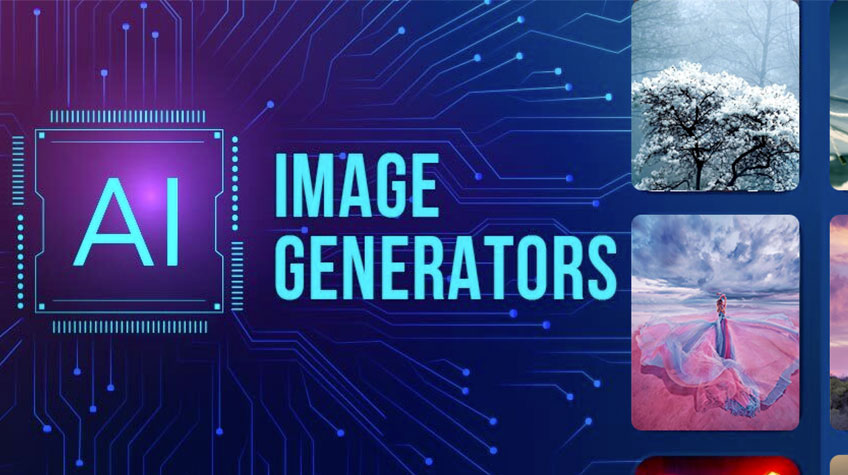